In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import classification_report


In [2]:
start = '2014-01-01'
end = '2024-04-10'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...,...
2587,2024-04-15,160.279999,160.830002,156.149994,156.330002,156.330002,21140900
2588,2024-04-16,155.639999,157.229996,155.050003,156.000000,156.000000,15413200
2589,2024-04-17,157.190002,158.681000,156.134995,156.880005,156.880005,16237800
2590,2024-04-18,156.925003,158.485001,156.210007,157.460007,157.460007,14016100


In [4]:
ma_100_days = data.Close.rolling(100).mean()

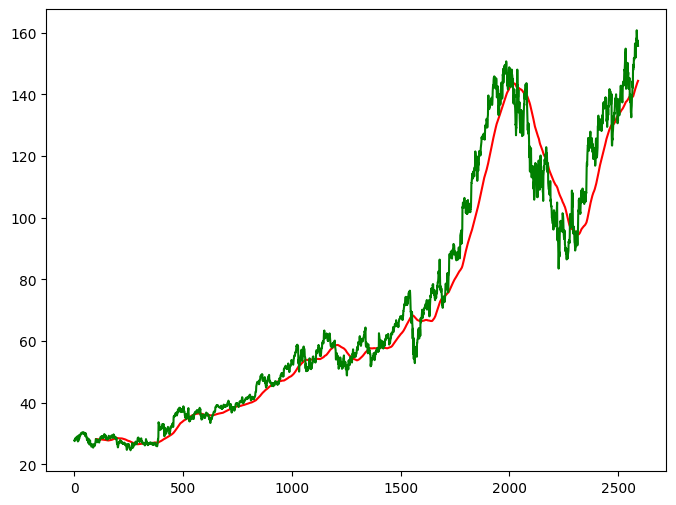

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

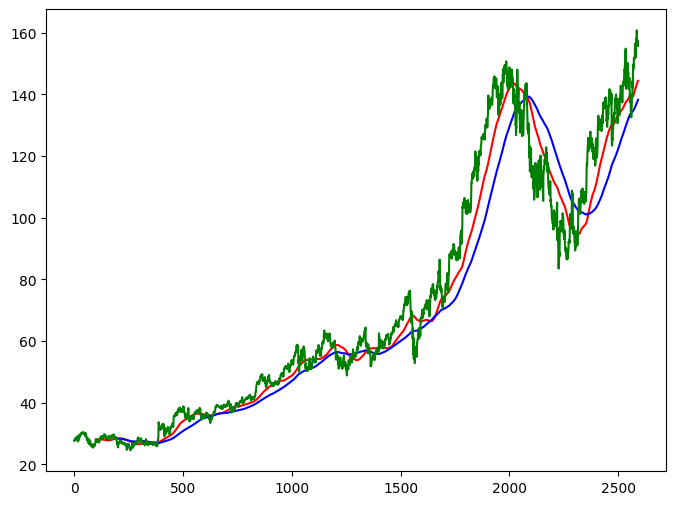

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [5]:
data.dropna(inplace=True)

In [6]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [7]:
data_train.shape[0]

2084

In [8]:
data_test.shape[0]

522

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

    

In [14]:
x, y = np.array(x_train), np.array(y_train)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)


Epoch 1/50
32/62 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0863

KeyboardInterrupt: 

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [22]:
data_test_scale  =  scaler.fit_transform(data_test)

In [23]:
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
x, y = np.array(x_test), np.array(y_test)
print(x)
print(y)

[[[0.72696225]
  [0.74522171]
  [0.73683479]
  ...
  [0.58730594]
  [0.56009421]
  [0.51337576]]

 [[0.74522171]
  [0.73683479]
  [0.70497234]
  ...
  [0.56009421]
  [0.51337576]
  [0.49761082]]

 [[0.73683479]
  [0.70497234]
  [0.70140801]
  ...
  [0.51337576]
  [0.49761082]
  [0.51880261]]

 ...

 [[0.55598668]
  [0.55964524]
  [0.55110861]
  ...
  [0.94201779]
  [0.94789361]
  [0.9572062 ]]

 [[0.55964524]
  [0.55110861]
  [0.55820395]
  ...
  [0.94789361]
  [0.9572062 ]
  [0.99212853]]

 [[0.55110861]
  [0.55820395]
  [0.5953437 ]
  ...
  [0.9572062 ]
  [0.99212853]
  [0.97195123]]]
[0.49761082 0.51880261 0.48517736 0.49302659 0.52151891 0.49618069
 0.45950665 0.40048779 0.44079823 0.39929043 0.34956209 0.39824279
 0.34896341 0.37324832 0.38402995 0.43331482 0.36869732 0.35665193
 0.32809313 0.34472842 0.33781595 0.32894683 0.3661364  0.34703441
 0.36819845 0.32052108 0.3021674  0.28628608 0.31237802 0.24873618
 0.24777718 0.27501107 0.32493353 0.33868073 0.3397672  0.3797783
 0.34

In [24]:
y_predict = model.predict(x)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


In [25]:
scale =1/scaler.scale_

In [26]:
y_predict = y_predict*scale

In [27]:
y = y*scale

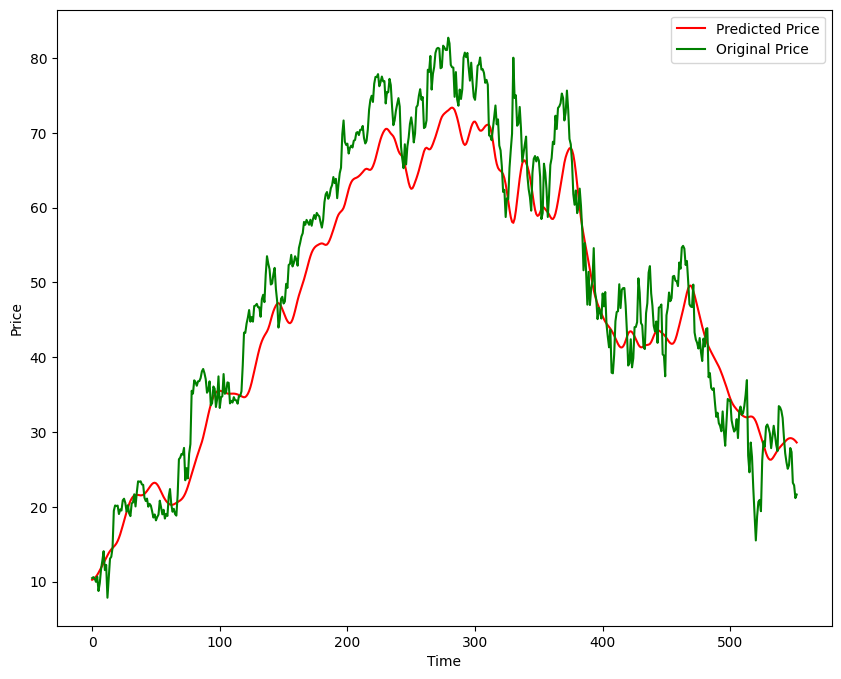

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')